In [7]:
import matplotlib.pyplot as plt
import numpy as np

from helpers import *
from implementations import ridge_regression
from cross_validation import cross_validation_ridge
from functions import abs_dif, mult 
from feature_eng import build_x
from predictions import predict_labels

In [8]:
# Loading the data sets
y_train, x_brute_train, _ = load_csv_data("../data/train.csv")
_, x_brute_test, indices_test = load_csv_data("../data/test.csv")
x_brute = np.concatenate((x_brute_train, x_brute_test))
train_size = x_brute_train.shape[0]
test_size = x_brute_test.shape[0]

# Constants
PHI_features = [15, 18, 20, 25, 28]
invalid_value = -999

# Mask to subdivide in different models
# Mask for the data (rows)
data_masks = [
    x_brute[:, 22] == 0,
    x_brute[:, 22] == 1,
    x_brute[:, 22] > 1
]
num_models = len(data_masks)

# Mask for the features (columns)
features_masks = [(x_brute[m].std(axis=0) != 0) & np.any(x_brute[m] != -999., axis=0) & ~range_mask(30, PHI_features) for m in data_masks]

# Separate X and Y using the masks
ys_train = [y_train[mask[:train_size]] for mask in data_masks]
xs_brute_train = [x_brute_train[d_m[:train_size]][:, f_m] for d_m, f_m in zip(data_masks, features_masks)]
xs_brute_test = [x_brute_test[d_m[train_size:]][:, f_m] for d_m, f_m in zip(data_masks, features_masks)]

In [9]:
# FINAL PARAMETERS

num_models = len(data_masks)
degrees = [9, 11, 12]
roots = [3, 4, 3]
tanh_degrees = [3, 4, 3]
log_degrees = [3, 4, 3]
inv_log_degrees = [3, 4, 3]
fn_tanh = [True] * num_models
fn_log = [False] * num_models
fn_inv_log = [True] * num_models
functions = [[mult, abs_dif],] * num_models

def build_ith_x(i):
     return build_x(xs_brute_train[i], xs_brute_test[i], degrees[i], roots[i], log_degree=log_degrees[i], tanh_degree=tanh_degrees[i],
                    inv_log_degree=inv_log_degrees[i], fn_log=fn_log[i], fn_inv_log=fn_inv_log[i], fn_tanh=fn_tanh[i],
                    functions=functions[i], print_=True)

# PLOTS

In [40]:
def box_plot(data, xlabel, positions, filename=None):
    plt.figure(figsize=(15,8))
    if filename != None:
        np.save("matrices/{}.npy".format(filename), data)
        plt.savefig("plots/{}.png".format(filename))
    
    plt.boxplot(data, 0, '', showmeans=False, labels=positions)
    plt.xlabel(xlabel)
    plt.show()

## LAMBDA

In [12]:
model_selected = 0
lambdas_tuning = np.logspace(-8, -1, 15)

lambdas_tuning_scores = []
iters = 2
k_fold = 4

#for lambda_ in lambdas_tuning:
    x_train, _ = build_ith_x(model_selected)
    scores = []
    for it in range(iters):
        score = cross_validation_ridge(ys_train[model_selected], x_train, k_fold, lambda_, seed=100+it)
        scores.extend(score)
    lambdas_tuning_scores.append(scores)
    

9 3 3 3 3 False True True [<function mult at 0x7ffa59b30b70>, <function abs_dif at 0x7ffa59b30ae8>]
Starting pre-processing
Starting poly
Starting combinations
Final shape: (327371, 2281)
9 3 3 3 3 False True True [<function mult at 0x7ffa59b30b70>, <function abs_dif at 0x7ffa59b30ae8>]
Starting pre-processing
Starting poly
Starting combinations
Final shape: (327371, 2281)
9 3 3 3 3 False True True [<function mult at 0x7ffa59b30b70>, <function abs_dif at 0x7ffa59b30ae8>]
Starting pre-processing
Starting poly
Starting combinations
Final shape: (327371, 2281)
9 3 3 3 3 False True True [<function mult at 0x7ffa59b30b70>, <function abs_dif at 0x7ffa59b30ae8>]
Starting pre-processing
Starting poly
Starting combinations
Final shape: (327371, 2281)
9 3 3 3 3 False True True [<function mult at 0x7ffa59b30b70>, <function abs_dif at 0x7ffa59b30ae8>]
Starting pre-processing
Starting poly
Starting combinations
Final shape: (327371, 2281)
9 3 3 3 3 False True True [<function mult at 0x7ffa59b30b70>

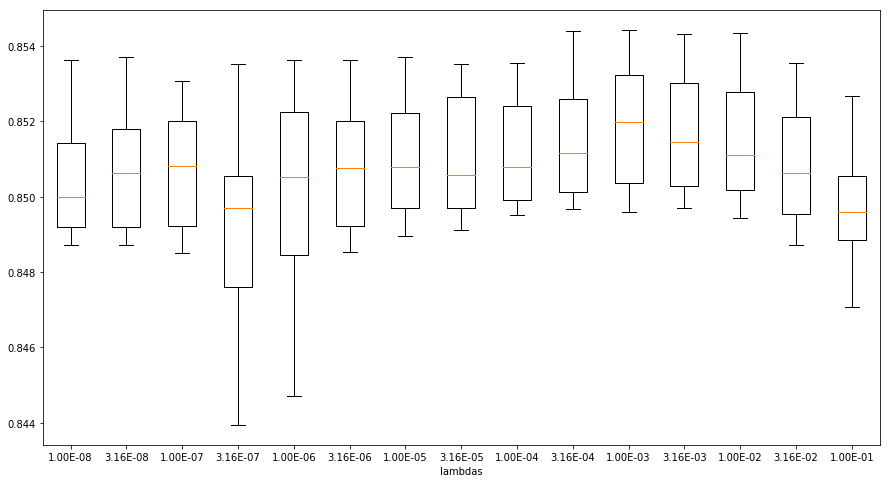

In [44]:
box_plot(np.array(lambdas_tuning_scores).T, positions=["{:.2E}".format(l) for l in lambdas_tuning], xlabel="lambdas", filename="lambdas_tuning_model-{}".format(model_selected))

0.001

## DEGREE

In [ ]:
model_selected = 0
lambda_ = 1e-03

degrees_tuning = range(1, 15)
degrees_tuning_scores = []

for deg in degrees_tuning:
    degrees = [deg] * 3
    
    x_train, _ = build_ith_x(model_selected)
    scores = []
    for it in range(iters):
        score = cross_validation_ridge(ys_train[model_selected], x_train, k_fold, lambda_, seed=100+it)
        scores.extend(score)
    degrees_tuning_scores.append(np.mean(scores))
    

1 3 3 3 3 False True True [<function mult at 0x7ffa59b30b70>, <function abs_dif at 0x7ffa59b30ae8>]
Starting pre-processing
Starting poly
Starting combinations


In [ ]:
box_plot(np.array(degrees_tuning_scores).T, "degrees_tuning_model-{}".format(model_selected))

## Different Models

In [ ]:
# FINAL PARAMETERS

num_models = len(data_masks)
degrees = [9, 11, 12]
roots = [3, 4, 3]
tanh_degrees = [3, 4, 3]
log_degrees = [3, 4, 3]
inv_log_degrees = [3, 4, 3]
fn_tanh = [True] * num_models
fn_log = [False] * num_models
fn_inv_log = [True] * num_models
functions = [[mult, abs_dif],] * num_models

def build_ith_x(i):
     return build_x(xs_brute_train[i], xs_brute_test[i], degrees[i], roots[i], log_degree=log_degrees[i], tanh_degree=tanh_degrees[i],
                    inv_log_degree=inv_log_degrees[i], fn_log=fn_log[i], fn_inv_log=fn_inv_log[i], fn_tanh=fn_tanh[i],
                    functions=functions[i], print_=True)